Import libraries/ dependencies

In [1]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob
import random
import cv2
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt     
from keras.preprocessing import image                  
from tqdm import tqdm
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import log_loss
import math

Using TensorFlow backend.


Import images

In [5]:
def load_train (path):
    data=load_files(path)
    driver_file=np.array(data['filenames'])
    driver_target=np_utils.to_categorical(np.array(data['target']),10)
    
    return driver_file,driver_target
import os
#**need to add the img name
def load_test(path):
    data=glob(path)
    driver_file=np.array(glob(path))
    driver_id=[]
    for p in data:
        driver_id.append(os.path.basename(p))
   # driver_id=os.path.basename(p)
    #test_id=np.array(driver_file['target'])
    return driver_file,driver_id


#submission training set
train_files,train_targets = load_train('Data/imgs/train')

#Submission Test set - has no labels
test_files,test_id = load_test('Data/imgs/test/*')


Split Data into train and test

In [6]:
# My own test set - split the training set 
X_train, X_test, y_train, y_test = train_test_split(train_files,train_targets ,test_size=0.3,random_state=42)

#optional: split the test set to get a validation set
    #X_train, X_test, y_train, y_test = train_test_split(train_targets,train_files, test_size=0.3,random_state=42)

Data Analysis

training targets size 22424
test targets size 79726
Data/imgs/train\c9\img_54.jpg
Data/imgs/train\c1\img_94750.jpg
Data/imgs/train\c9\img_90465.jpg
Data/imgs/train\c3\img_89554.jpg
Data/imgs/train\c5\img_13547.jpg
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
train size 15696
test size 6728
(15696,) (15696, 10)
(6728,) (6728, 10)
Data/imgs/train\c0\img_34878.jpg


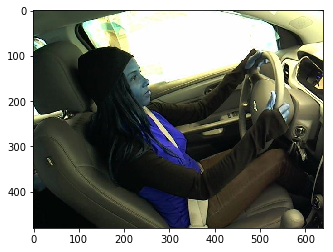

Data/imgs/train\c4\img_8574.jpg
Data/imgs/train\c0\img_34878.jpg
Data/imgs/train\c1\img_22769.jpg
Data/imgs/train\c7\img_32410.jpg
Data/imgs/train\c5\img_46440.jpg
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Data/imgs/train\c3\img_34022.jpg
Data/imgs/train\c0\img_65547.jpg
Data/imgs/train\c7\img_44693.jpg
Data/imgs/train\c8\img_27059.jpg
Data/imgs/train\c5\img_45097.jpg
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [7]:
#Final datasets
print('training targets size %d' % len(train_targets))
print('test targets size %d' % len(test_files))

#first 5 sample values
for q in train_files[:5]: print(q)
for p in train_targets[:5]: print (p)

    
    
#My own dataset
print('train size %d' % len(X_train))
print('test size %d' % len(X_test))

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



path=X_train[1]
print(path)
im = cv2.imread(path)
#cv2.imshow(im)
plt.imshow(im)
plt.show()
#img=cv2.imread(X_train[1])
#cv2.imshow('img',img)
#plt.imshow(img)
#plt.show()
for p in X_train[:5]: print (p)
for p in y_train[:5]: print (p)

for p in X_test[:5]: print (p)
for p in y_test[:5]: print (p)

Pre-process data

In [8]:


def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)                

# pre-process the data for Keras
train_targets=y_train
test_targets=y_test
train_tensors = paths_to_tensor(X_train).astype('float32')/255
test_tensors = paths_to_tensor(X_test).astype('float32')/255


100%|█████████████████████████████████████████████████████████████████████████████| 6728/6728 [00:43<00:00, 155.37it/s]


Image Enhancements

Model Architecture

In [9]:

model = Sequential()
### TODO: Define your architecture.
print('x_train shape:', train_tensors.shape)
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


model.summary()

x_train shape: (15696, 224, 224, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      4160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1003

Model Compilation

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model Training

In [11]:
checkpointer = ModelCheckpoint(filepath='saved_models/weightsfromscratch.hdf5', 
                               verbose=1, save_best_only=True)

In [16]:
history=model.fit(train_tensors, train_targets, validation_split=0.2,epochs=5, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 12556 samples, validate on 3140 samples
Epoch 1/5


 4060/12556 [========>.....................] - ETA: 10383s - loss: 2.3109 - acc: 0.200 - ETA: 5256s - loss: 8.7067 - acc: 0.125 - ETA: 3529s - loss: 9.4320 - acc: 0.10 - ETA: 2671s - loss: 8.0347 - acc: 0.08 - ETA: 2152s - loss: 6.9022 - acc: 0.10 - ETA: 1807s - loss: 6.1404 - acc: 0.10 - ETA: 1562s - loss: 5.5944 - acc: 0.10 - ETA: 1376s - loss: 5.1792 - acc: 0.13 - ETA: 1233s - loss: 4.8599 - acc: 0.12 - ETA: 1119s - loss: 4.6015 - acc: 0.13 - ETA: 1024s - loss: 4.3924 - acc: 0.13 - ETA: 946s - loss: 4.2205 - acc: 0.1292 - ETA: 881s - loss: 4.0717 - acc: 0.126 - ETA: 824s - loss: 3.9438 - acc: 0.128 - ETA: 774s - loss: 3.8330 - acc: 0.123 - ETA: 731s - loss: 3.7375 - acc: 0.121 - ETA: 693s - loss: 3.6514 - acc: 0.123 - ETA: 662s - loss: 3.5744 - acc: 0.130 - ETA: 631s - loss: 3.5047 - acc: 0.134 - ETA: 614s - loss: 3.4436 - acc: 0.130 - ETA: 589s - loss: 3.3872 - acc: 0.133 - ETA: 566s - loss: 3.3413 - acc: 0.134 - ETA: 545s - loss: 3.2951 - acc: 0.134 - ETA: 525s - loss: 3.2520 - ac

 8320/12556 [==================>...........] - ETA: 118s - loss: 1.4203 - acc: 0.559 - ETA: 117s - loss: 1.4156 - acc: 0.560 - ETA: 117s - loss: 1.4106 - acc: 0.562 - ETA: 117s - loss: 1.4062 - acc: 0.563 - ETA: 117s - loss: 1.4016 - acc: 0.565 - ETA: 117s - loss: 1.3984 - acc: 0.566 - ETA: 116s - loss: 1.3928 - acc: 0.567 - ETA: 116s - loss: 1.3876 - acc: 0.569 - ETA: 115s - loss: 1.3818 - acc: 0.571 - ETA: 115s - loss: 1.3761 - acc: 0.573 - ETA: 114s - loss: 1.3713 - acc: 0.574 - ETA: 114s - loss: 1.3668 - acc: 0.576 - ETA: 113s - loss: 1.3614 - acc: 0.577 - ETA: 113s - loss: 1.3573 - acc: 0.579 - ETA: 112s - loss: 1.3534 - acc: 0.580 - ETA: 112s - loss: 1.3489 - acc: 0.582 - ETA: 111s - loss: 1.3436 - acc: 0.584 - ETA: 111s - loss: 1.3384 - acc: 0.585 - ETA: 111s - loss: 1.3340 - acc: 0.587 - ETA: 110s - loss: 1.3291 - acc: 0.589 - ETA: 110s - loss: 1.3256 - acc: 0.590 - ETA: 109s - loss: 1.3221 - acc: 0.591 - ETA: 109s - loss: 1.3177 - acc: 0.592 - ETA: 108s - loss: 1.3147 - acc: 0

12540/12556 [============================>.] - ETA: 51s - loss: 0.8374 - acc: 0.74 - ETA: 51s - loss: 0.8356 - acc: 0.74 - ETA: 50s - loss: 0.8340 - acc: 0.74 - ETA: 50s - loss: 0.8331 - acc: 0.74 - ETA: 50s - loss: 0.8314 - acc: 0.74 - ETA: 49s - loss: 0.8305 - acc: 0.74 - ETA: 49s - loss: 0.8291 - acc: 0.74 - ETA: 49s - loss: 0.8272 - acc: 0.74 - ETA: 49s - loss: 0.8254 - acc: 0.74 - ETA: 48s - loss: 0.8235 - acc: 0.74 - ETA: 48s - loss: 0.8218 - acc: 0.74 - ETA: 48s - loss: 0.8205 - acc: 0.74 - ETA: 47s - loss: 0.8188 - acc: 0.74 - ETA: 47s - loss: 0.8177 - acc: 0.74 - ETA: 47s - loss: 0.8160 - acc: 0.74 - ETA: 47s - loss: 0.8146 - acc: 0.74 - ETA: 46s - loss: 0.8140 - acc: 0.74 - ETA: 46s - loss: 0.8125 - acc: 0.75 - ETA: 46s - loss: 0.8108 - acc: 0.75 - ETA: 45s - loss: 0.8091 - acc: 0.75 - ETA: 45s - loss: 0.8074 - acc: 0.75 - ETA: 45s - loss: 0.8061 - acc: 0.75 - ETA: 45s - loss: 0.8054 - acc: 0.75 - ETA: 44s - loss: 0.8037 - acc: 0.75 - ETA: 44s - loss: 0.8020 - acc: 0.75 - ETA

12556/12556 [==============================] - 165s - loss: 0.6101 - acc: 0.8132 - val_loss: 0.0636 - val_acc: 0.9777
Epoch 2/5


 4280/12556 [=========>....................] - ETA: 233s - loss: 0.0151 - acc: 1.000 - ETA: 159s - loss: 0.0119 - acc: 1.000 - ETA: 134s - loss: 0.0105 - acc: 1.000 - ETA: 122s - loss: 0.0098 - acc: 1.000 - ETA: 113s - loss: 0.0138 - acc: 1.000 - ETA: 109s - loss: 0.0321 - acc: 0.991 - ETA: 105s - loss: 0.0353 - acc: 0.992 - ETA: 102s - loss: 0.0472 - acc: 0.987 - ETA: 101s - loss: 0.0428 - acc: 0.988 - ETA: 99s - loss: 0.0435 - acc: 0.985 - ETA: 97s - loss: 0.0402 - acc: 0.98 - ETA: 96s - loss: 0.0382 - acc: 0.98 - ETA: 95s - loss: 0.0411 - acc: 0.98 - ETA: 94s - loss: 0.0387 - acc: 0.98 - ETA: 92s - loss: 0.0475 - acc: 0.98 - ETA: 92s - loss: 0.0505 - acc: 0.97 - ETA: 91s - loss: 0.0481 - acc: 0.97 - ETA: 90s - loss: 0.1081 - acc: 0.97 - ETA: 90s - loss: 0.1214 - acc: 0.97 - ETA: 90s - loss: 0.1217 - acc: 0.96 - ETA: 89s - loss: 0.1167 - acc: 0.96 - ETA: 88s - loss: 0.1162 - acc: 0.97 - ETA: 88s - loss: 0.1181 - acc: 0.96 - ETA: 88s - loss: 0.1142 - acc: 0.96 - ETA: 87s - loss: 0.110

 8580/12556 [===================>..........] - ETA: 61s - loss: 0.0867 - acc: 0.97 - ETA: 61s - loss: 0.0864 - acc: 0.97 - ETA: 61s - loss: 0.0865 - acc: 0.97 - ETA: 60s - loss: 0.0863 - acc: 0.97 - ETA: 60s - loss: 0.0860 - acc: 0.97 - ETA: 60s - loss: 0.0861 - acc: 0.97 - ETA: 60s - loss: 0.0858 - acc: 0.97 - ETA: 60s - loss: 0.0854 - acc: 0.97 - ETA: 60s - loss: 0.0850 - acc: 0.97 - ETA: 60s - loss: 0.0855 - acc: 0.97 - ETA: 59s - loss: 0.0861 - acc: 0.97 - ETA: 59s - loss: 0.0859 - acc: 0.97 - ETA: 59s - loss: 0.0855 - acc: 0.97 - ETA: 59s - loss: 0.0855 - acc: 0.97 - ETA: 59s - loss: 0.0852 - acc: 0.97 - ETA: 59s - loss: 0.0848 - acc: 0.97 - ETA: 59s - loss: 0.0845 - acc: 0.97 - ETA: 58s - loss: 0.0847 - acc: 0.97 - ETA: 58s - loss: 0.0845 - acc: 0.97 - ETA: 58s - loss: 0.0844 - acc: 0.97 - ETA: 58s - loss: 0.0842 - acc: 0.97 - ETA: 58s - loss: 0.0839 - acc: 0.97 - ETA: 58s - loss: 0.0835 - acc: 0.97 - ETA: 58s - loss: 0.0832 - acc: 0.97 - ETA: 57s - loss: 0.0829 - acc: 0.97 - ETA

12556/12556 [==============================] - 125s - loss: 0.0737 - acc: 0.9784 - val_loss: 0.0337 - val_acc: 0.9908
Epoch 3/5


 4300/12556 [=========>....................] - ETA: 102s - loss: 2.1877e-04 - acc: 1.000 - ETA: 94s - loss: 0.0026 - acc: 1.0000    - ETA: 90s - loss: 0.0021 - acc: 1.00 - ETA: 90s - loss: 0.0018 - acc: 1.00 - ETA: 87s - loss: 0.0016 - acc: 1.00 - ETA: 87s - loss: 0.0014 - acc: 1.00 - ETA: 87s - loss: 0.0016 - acc: 1.00 - ETA: 86s - loss: 0.0021 - acc: 1.00 - ETA: 84s - loss: 0.0019 - acc: 1.00 - ETA: 85s - loss: 0.0018 - acc: 1.00 - ETA: 85s - loss: 0.0016 - acc: 1.00 - ETA: 84s - loss: 0.0038 - acc: 1.00 - ETA: 84s - loss: 0.0226 - acc: 0.99 - ETA: 84s - loss: 0.0218 - acc: 0.99 - ETA: 84s - loss: 0.0273 - acc: 0.99 - ETA: 83s - loss: 0.0472 - acc: 0.98 - ETA: 83s - loss: 0.0446 - acc: 0.98 - ETA: 83s - loss: 0.0426 - acc: 0.98 - ETA: 82s - loss: 0.0404 - acc: 0.98 - ETA: 83s - loss: 0.0394 - acc: 0.98 - ETA: 82s - loss: 0.0407 - acc: 0.98 - ETA: 82s - loss: 0.0388 - acc: 0.98 - ETA: 82s - loss: 0.0372 - acc: 0.98 - ETA: 82s - loss: 0.0358 - acc: 0.98 - ETA: 84s - loss: 0.0368 - acc:

 8600/12556 [===================>..........] - ETA: 60s - loss: 0.0405 - acc: 0.98 - ETA: 59s - loss: 0.0403 - acc: 0.98 - ETA: 59s - loss: 0.0401 - acc: 0.98 - ETA: 59s - loss: 0.0400 - acc: 0.98 - ETA: 59s - loss: 0.0398 - acc: 0.98 - ETA: 59s - loss: 0.0397 - acc: 0.98 - ETA: 59s - loss: 0.0395 - acc: 0.98 - ETA: 58s - loss: 0.0393 - acc: 0.98 - ETA: 58s - loss: 0.0391 - acc: 0.98 - ETA: 58s - loss: 0.0390 - acc: 0.98 - ETA: 58s - loss: 0.0388 - acc: 0.98 - ETA: 58s - loss: 0.0387 - acc: 0.98 - ETA: 58s - loss: 0.0385 - acc: 0.98 - ETA: 58s - loss: 0.0383 - acc: 0.98 - ETA: 57s - loss: 0.0382 - acc: 0.98 - ETA: 57s - loss: 0.0380 - acc: 0.98 - ETA: 57s - loss: 0.0378 - acc: 0.98 - ETA: 58s - loss: 0.0377 - acc: 0.98 - ETA: 59s - loss: 0.0376 - acc: 0.98 - ETA: 59s - loss: 0.0374 - acc: 0.98 - ETA: 58s - loss: 0.0374 - acc: 0.98 - ETA: 58s - loss: 0.0372 - acc: 0.98 - ETA: 58s - loss: 0.0370 - acc: 0.98 - ETA: 58s - loss: 0.0369 - acc: 0.98 - ETA: 58s - loss: 0.0368 - acc: 0.98 - ETA

12556/12556 [==============================] - 122s - loss: 0.0364 - acc: 0.9904 - val_loss: 0.0266 - val_acc: 0.9927
Epoch 4/5


 4280/12556 [=========>....................] - ETA: 106s - loss: 8.8817e-05 - acc: 1.000 - ETA: 94s - loss: 1.1300e-04 - acc: 1.000 - ETA: 90s - loss: 0.0031 - acc: 1.0000   - ETA: 88s - loss: 0.0071 - acc: 1.00 - ETA: 87s - loss: 0.0059 - acc: 1.00 - ETA: 87s - loss: 0.0050 - acc: 1.00 - ETA: 86s - loss: 0.0043 - acc: 1.00 - ETA: 85s - loss: 0.0038 - acc: 1.00 - ETA: 85s - loss: 0.0037 - acc: 1.00 - ETA: 85s - loss: 0.0037 - acc: 1.00 - ETA: 85s - loss: 0.0036 - acc: 1.00 - ETA: 84s - loss: 0.0033 - acc: 1.00 - ETA: 84s - loss: 0.0031 - acc: 1.00 - ETA: 84s - loss: 0.0030 - acc: 1.00 - ETA: 83s - loss: 0.0028 - acc: 1.00 - ETA: 83s - loss: 0.0030 - acc: 1.00 - ETA: 83s - loss: 0.0028 - acc: 1.00 - ETA: 82s - loss: 0.0030 - acc: 1.00 - ETA: 82s - loss: 0.0033 - acc: 1.00 - ETA: 83s - loss: 0.0160 - acc: 0.99 - ETA: 82s - loss: 0.0152 - acc: 0.99 - ETA: 82s - loss: 0.0305 - acc: 0.99 - ETA: 82s - loss: 0.0305 - acc: 0.99 - ETA: 82s - loss: 0.0293 - acc: 0.99 - ETA: 82s - loss: 0.0281 - 

 8580/12556 [===================>..........] - ETA: 62s - loss: 0.0307 - acc: 0.99 - ETA: 62s - loss: 0.0306 - acc: 0.99 - ETA: 62s - loss: 0.0304 - acc: 0.99 - ETA: 62s - loss: 0.0303 - acc: 0.99 - ETA: 62s - loss: 0.0302 - acc: 0.99 - ETA: 61s - loss: 0.0301 - acc: 0.99 - ETA: 61s - loss: 0.0300 - acc: 0.99 - ETA: 61s - loss: 0.0298 - acc: 0.99 - ETA: 61s - loss: 0.0298 - acc: 0.99 - ETA: 61s - loss: 0.0302 - acc: 0.99 - ETA: 61s - loss: 0.0301 - acc: 0.99 - ETA: 61s - loss: 0.0299 - acc: 0.99 - ETA: 60s - loss: 0.0298 - acc: 0.99 - ETA: 60s - loss: 0.0297 - acc: 0.99 - ETA: 60s - loss: 0.0296 - acc: 0.99 - ETA: 60s - loss: 0.0294 - acc: 0.99 - ETA: 60s - loss: 0.0293 - acc: 0.99 - ETA: 60s - loss: 0.0292 - acc: 0.99 - ETA: 60s - loss: 0.0291 - acc: 0.99 - ETA: 60s - loss: 0.0289 - acc: 0.99 - ETA: 59s - loss: 0.0288 - acc: 0.99 - ETA: 59s - loss: 0.0287 - acc: 0.99 - ETA: 59s - loss: 0.0286 - acc: 0.99 - ETA: 59s - loss: 0.0284 - acc: 0.99 - ETA: 59s - loss: 0.0283 - acc: 0.99 - ETA

12556/12556 [==============================] - 125s - loss: 0.0279 - acc: 0.9933 - val_loss: 0.0202 - val_acc: 0.9943
Epoch 5/5


 4260/12556 [=========>....................] - ETA: 365s - loss: 0.0164 - acc: 1.000 - ETA: 340s - loss: 0.0082 - acc: 1.000 - ETA: 254s - loss: 0.0055 - acc: 1.000 - ETA: 213s - loss: 0.0042 - acc: 1.000 - ETA: 185s - loss: 0.0034 - acc: 1.000 - ETA: 167s - loss: 0.0028 - acc: 1.000 - ETA: 156s - loss: 0.0025 - acc: 1.000 - ETA: 147s - loss: 0.0028 - acc: 1.000 - ETA: 139s - loss: 0.0027 - acc: 1.000 - ETA: 133s - loss: 0.0024 - acc: 1.000 - ETA: 129s - loss: 0.0022 - acc: 1.000 - ETA: 125s - loss: 0.0022 - acc: 1.000 - ETA: 122s - loss: 0.0020 - acc: 1.000 - ETA: 119s - loss: 0.0019 - acc: 1.000 - ETA: 116s - loss: 0.0131 - acc: 0.996 - ETA: 114s - loss: 0.0122 - acc: 0.996 - ETA: 112s - loss: 0.0249 - acc: 0.994 - ETA: 110s - loss: 0.0268 - acc: 0.991 - ETA: 108s - loss: 0.0255 - acc: 0.992 - ETA: 106s - loss: 0.0243 - acc: 0.992 - ETA: 105s - loss: 0.0258 - acc: 0.990 - ETA: 104s - loss: 0.0247 - acc: 0.990 - ETA: 103s - loss: 0.0236 - acc: 0.991 - ETA: 104s - loss: 0.0232 - acc: 0

 8560/12556 [===================>..........] - ETA: 59s - loss: 0.0223 - acc: 0.99 - ETA: 59s - loss: 0.0222 - acc: 0.99 - ETA: 59s - loss: 0.0221 - acc: 0.99 - ETA: 59s - loss: 0.0220 - acc: 0.99 - ETA: 58s - loss: 0.0219 - acc: 0.99 - ETA: 58s - loss: 0.0218 - acc: 0.99 - ETA: 58s - loss: 0.0217 - acc: 0.99 - ETA: 58s - loss: 0.0216 - acc: 0.99 - ETA: 58s - loss: 0.0215 - acc: 0.99 - ETA: 58s - loss: 0.0215 - acc: 0.99 - ETA: 58s - loss: 0.0214 - acc: 0.99 - ETA: 57s - loss: 0.0215 - acc: 0.99 - ETA: 57s - loss: 0.0232 - acc: 0.99 - ETA: 57s - loss: 0.0231 - acc: 0.99 - ETA: 57s - loss: 0.0235 - acc: 0.99 - ETA: 57s - loss: 0.0234 - acc: 0.99 - ETA: 57s - loss: 0.0234 - acc: 0.99 - ETA: 57s - loss: 0.0233 - acc: 0.99 - ETA: 56s - loss: 0.0232 - acc: 0.99 - ETA: 56s - loss: 0.0231 - acc: 0.99 - ETA: 56s - loss: 0.0230 - acc: 0.99 - ETA: 56s - loss: 0.0231 - acc: 0.99 - ETA: 56s - loss: 0.0230 - acc: 0.99 - ETA: 56s - loss: 0.0229 - acc: 0.99 - ETA: 56s - loss: 0.0228 - acc: 0.99 - ETA

12556/12556 [==============================] - 121s - loss: 0.0195 - acc: 0.9949 - val_loss: 0.0202 - val_acc: 0.9949


Model accuracy etc

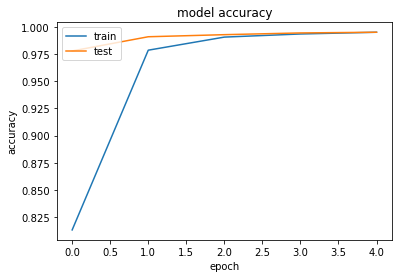

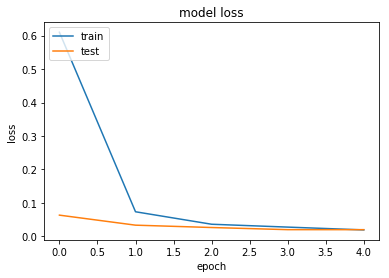

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model Testing

In [18]:
model.load_weights('saved_models/weightsfromscratch.hdf5')
#score = model.evaluate(test_tensors, test_targets, verbose=1)
#print(score)

Model results

In [20]:
print('helloworld')
predictions=model.predict(test_tensors, verbose=1)
score=log_loss(test_targets,predictions)
print('Score log_loss: ', score)

helloworld
6728/6728 [==============================] - ETA: 12 - ETA: 76s - ETA: 58 - ETA: 49 - ETA: 44 - ETA: 53 - ETA: 49 - ETA: 45 - ETA: 42 - ETA: 40 - ETA: 38 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 30 - ETA: 31 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 18 - ETA: 18 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 19 - ETA: 18 - ETA: 18 - ETA

In [21]:
def mlogloss(target, pred):
    score = 0.0
    for i in range(len(pred)):
        pp = pred[i]
        for j in range(len(pp)):
            prob = pp[j]
            if prob < 1e-15:
                prob = 1e-15
            score += target[i][j] * math.log(prob)
    return -score/len(pred)
score = mlogloss(test_targets, predictions)
print('Score : mlogloss', score)

Score : mlogloss 0.0199377499599


**Kaggle Submission**

Reduce test set size

In [23]:
test_files=test_files[:10000]
test_id=test_id[:10000]
final_test_tensors = paths_to_tensor(test_files).astype('float32')/255

 66%|██████████████████████████████████████████████████▉                          | 6611/10000 [01:30<01:56, 29.09it/s]

MemoryError: 

Predict complete test set

In [ ]:
predictions=model.predict(final_test_tensors, verbose=1)

Create submission format

In [ ]:
def create_submission(predictions, test_id, loss):
    result1 = pd.DataFrame(predictions, columns=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
    result1.loc[:, 'img'] = pd.Series(test_id, index=result1.index)
    now = datetime.datetime.now()
    if not os.path.isdir('subm'):
        os.mkdir('subm')
    suffix = str(round(loss, 6)) + '_' + str(now.strftime("%Y-%m-%d-%H-%M"))
    sub_file = os.path.join('subm', 'submission_' + suffix + '.csv')
    result1.to_csv(sub_file, index=False)

In [ ]:
create_submission(predictions,test_id,score)